# EXERCICE 1 : DONNÉE INFOCLIMAT

### Requête sur le site

In [16]:
import json
import requests

url = "http://www.infoclimat.fr/public-api/gfs/json?_ll=48.85341,2.3488&_auth=AhgAF1MtAyFXelFmBHJReAJqBTAJf1N0AHwHZABlVCkCaVU0BmZTNQBuA34FKlJkV3pTMFtgBjZROgJ6AHJQMQJoAGxTOANkVzhRNAQrUXoCLAVkCSlTdABrB2kAc1Q0AmFVLwZnUzgAcQNnBT1SeVd7UzJbYwY9UTECbABlUDoCYQBkUzMDflcnUTUEM1FgAmAFbAk0U2MAMQc2AG1UPwIyVWUGbVMvAG8DZQU3UmdXZFM6W2UGNlEtAnoAFFBAAnwAJFNyAzRXflEuBGFROwJl&_c=41c726a4cd6dfaf5e80782c6b574c218"
try:
    api_request = requests.get(url)
    data = json.loads(api_request.content)
except Exception as e:
    data = "Error..."


### Afficher les clés demandées

In [17]:
print(type(data))
print('Request Key',data['request_key'])
print("Request State",data['request_state'])
print("Message",data["message"])
print("Model Run",data["model_run"])
print("Source",data["source"])

<class 'dict'>
Request Key fd543c77e33d6c8a5e218e948a19e487
Request State 200
Message OK
Model Run 19
Source internal:GFS:1


### Supprimer ces clés du dico

In [18]:
data.pop("request_key")
data.pop("request_state")
data.pop("message")
data.pop("model_run")
data.pop("source")

'internal:GFS:1'

### Température

In [21]:
print(data['2024-12-11 22:00:00']["temperature"]["2m"])
print(data["2024-12-11 22:00:00"]["temperature"]["sol"])


277.9
276.3


### Humidité

In [22]:
print(data['2024-12-11 22:00:00']['humidite'])

{'2m': 71.9}


### Liste par compréhension

In [24]:
from datetime import datetime

dt = datetime.strptime('2024-12-11 22:00:00', '%Y-%m-%d %H:%M:%S')

lesDate = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S') for i in data.keys()]
lesTempA2m = [data[i]['temperature']['2m']-273.15 for i in data.keys()]
lesTempAuSol = [data[i]['temperature']['sol']-273.15 for i in data.keys()]
lesHumiditeA2m = [data[i]['humidite']['2m'] for i in data.keys()]

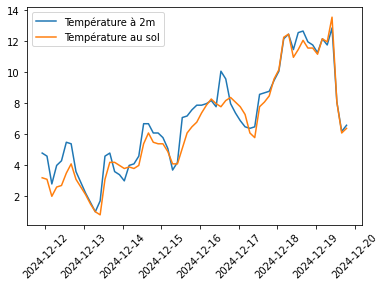

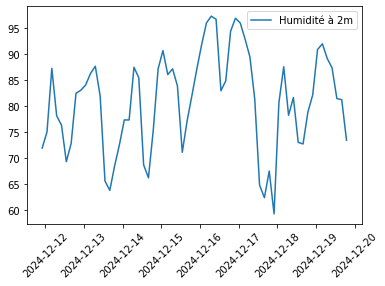

In [ ]:
import matplotlib.pyplot as plt

#Double graphique avec les températures à 2m et au sol
plt.figure()
plt.plot(lesDate,lesTempA2m)
plt.plot(lesDate,lesTempAuSol)
plt.legend(['Température à 2m','Température au sol'])
plt.xticks(rotation=45)
plt.show()

#Graphique de l'humidité à 2m
plt.figure()
plt.plot(lesDate,lesHumiditeA2m)
plt.legend(['Humidité à 2m'])
plt.xticks(rotation=45)
plt.show()

# EXERCICE 2 : WEBSCRAPPING

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.worldometers.info/world-population/population-by-country/"
req = requests.get(url)
soup = BeautifulSoup(req.text)
data = soup.find_all('table')[0]

df_population = pd.read_html(str(data))[0]
print(df_population.head())

export_csv = df_population.to_csv(r'export_dataframe.csv', index = None, header=True)

   # Country (or dependency)  Population  (2024) Yearly  Change  Net  Change  \
0  1                   India          1450935791         0.89 %     12866195   
1  2                   China          1419321278        -0.23 %     -3263655   
2  3           United States           345426571         0.57 %      1949236   
3  4               Indonesia           283487931         0.82 %      2297864   
4  5                Pakistan           251269164         1.52 %      3764669   

   Density  (P/Km²)  Land Area  (Km²)  Migrants  (net)  Fert.  Rate  \
0               488           2973190          -630830          2.0   
1               151           9388211          -318992          1.0   
2                38           9147420          1286132          1.6   
3               156           1811570           -38469          2.1   
4               326            770880         -1401173          3.5   

   Med.  Age Urban  Pop % World  Share  
0         28         37 %      17.78 %  
1         

C:\Users\jgoth\AppData\Local\Temp\ipykernel_17152\955718496.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_population = pd.read_html(str(data))[0]


# EXERCICE 3 : GUI Tkinter

In [45]:
import tkinter
from tkinter import *

fenetre = Tk()
fenetre.geometry("450x150")
monlabel1 = Label(fenetre, text="label1")
monlabel2 = Label(fenetre, text="label2")
monlabel3 = Label(fenetre, text="label3")
monlabel4 = Label(fenetre, text="label4")

monlabel1.grid(row=1, column=0)
monlabel2.grid(row=1, column=1)
monlabel3.grid(row=2, column=2)
monlabel4.grid(row=3, column=0, columnspan=3)

entreeNom = Entry(fenetre, width=50, bg='grey',fg='blue')
def myClick():
    monlabel4.config(text="Hello "+entreeNom.get(),fg='red')

entreeNom.grid(row=0, column=0, columnspan=3)
monBoutton = Button(fenetre, text="changer", padx = 10, pady = 10, command=myClick).grid(row=4, column=4)

fenetre.mainloop()